# M8HW Assignment: P Burke
## Module 8: Student choice module

Submit this code as a pull request back to GitHub Classroom by the date and time listed in Canvas.

For this assignment, I have selected to .

## Dataset Description
 * Atlantic HURDAT 2: [OASIS HUB HURDAT 2](https://oasishub.co/dataset/hurdat-2-atlantic-hurricane-database)  
 * GPM IMERGE doi:[10.5067/GPM/IMERGDF/DAY/06](https://disc.gsfc.nasa.gov/datasets/GPM_3IMERGDF_06/summary)   
 * NASA GLC doi:[1007/s11069-009-9401-4](https://link.springer.com/article/10.1007/s11069-009-9401-4)  


### Step 1: Access and prep hurricane data

Hurricane data come from the reanalysis project [NOAA National Hurricane Center's North Atlantic hurricane database (NHC HURDAT)](https://www.nhc.noaa.gov/data/). The dataset includes hurricane track and wind speed at 6 hour intervals from 1851 to 2014.

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#from datetime import datetime
#from sklearn.model_selection import train_test_split, RandomizedSearchCV
#from sklearn.linear_model import LinearRegression

In [18]:
ATh_track = pd.read_csv('./data/atlantic.csv')

In [19]:
ATh_track.tail(25)

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
49080,AL112015,JOAQUIN,20151014,0,,EX,36.0N,9.0W,20,1011,...,0,0,0,0,0,0,0,0,0,0
49081,AL112015,JOAQUIN,20151014,600,,EX,35.5N,8.7W,20,1011,...,0,0,0,0,0,0,0,0,0,0
49082,AL112015,JOAQUIN,20151014,1200,,EX,35.1N,8.4W,20,1011,...,0,0,0,0,0,0,0,0,0,0
49083,AL112015,JOAQUIN,20151014,1800,,EX,35.0N,8.0W,15,1012,...,0,0,0,0,0,0,0,0,0,0
49084,AL112015,JOAQUIN,20151015,0,,EX,35.2N,7.7W,15,1012,...,0,0,0,0,0,0,0,0,0,0
49085,AL122015,KATE,20151108,1800,,TD,22.2N,71.5W,30,1010,...,0,0,0,0,0,0,0,0,0,0
49086,AL122015,KATE,20151109,0,,TD,22.8N,72.6W,30,1010,...,0,0,0,0,0,0,0,0,0,0
49087,AL122015,KATE,20151109,600,,TS,23.4N,73.7W,35,1010,...,0,30,0,0,0,0,0,0,0,0
49088,AL122015,KATE,20151109,1200,,TS,24.1N,74.8W,40,1008,...,0,30,0,0,0,0,0,0,0,0
49089,AL122015,KATE,20151109,1800,,TS,25.0N,75.7W,45,1008,...,0,30,0,0,0,0,0,0,0,0


In [20]:
ATh_track.describe()

,Date,Time,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
count,4.910500e+04,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000,49105.000000
mean,1.949802e+07,910.125975,52.005091,-251.406496,-868.671031,-869.315772,-872.676428,-871.409245,-875.570940,-875.765319,-876.682028,-876.323205,-877.564321,-877.655045,-877.923552,-877.786295
std,4.461850e+05,671.043363,27.681902,964.313907,353.299666,351.548910,342.153768,345.628984,333.651396,333.133376,330.526085,331.535176,328.027275,327.774794,327.021430,327.408253
min,1.851062e+07,0.000000,-99.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
25%,1.911110e+07,600.000000,35.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
50%,1.956093e+07,1200.000000,45.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
75%,1.989081e+07,1800.000000,70.000000,990.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
max,2.015111e+07,2330.000000,165.000000,1024.000000,710.000000,600.000000,640.000000,530.000000,360.000000,300.000000,330.000000,360.000000,180.000000,250.000000,150.000000,180.000000


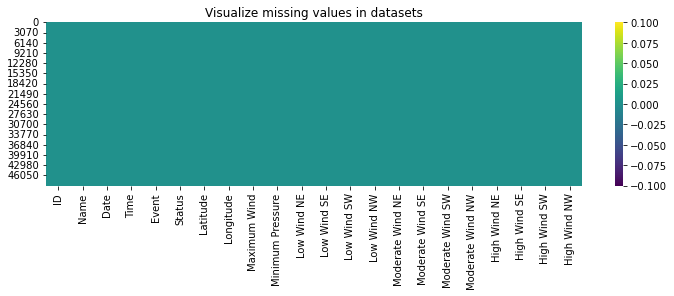

In [21]:
# Check for missing values

plt.figure(figsize=(12, 3))
sns.heatmap(ATh_track.isnull(), cmap='viridis');
plt.title('Visualize missing values in datasets');

### Next: Access Precipitation Data
Download GPM IMERG daily data as netCDF file

GPM IMERG Final Precipitation L3 1 day 0.1 degree x 0.1 degree V06 (GPM_3IMERGDF): https://disc.gsfc.nasa.gov/datasets/GPM_3IMERGDF_06/summary  
Youtube for accessing data: https://www.youtube.com/watch?v=T_Us4hJxSeI&ab_channel=AmanBagrecha  

Data Citation:
Huffman, G.J., E.F. Stocker, D.T. Bolvin, E.J. Nelkin, Jackson Tan (2019), GPM IMERG Final Precipitation L3 1 day 0.1 degree x 0.1 degree V06, Edited by Andrey Savtchenko, Greenbelt, MD, Goddard Earth Sciences Data and Information Services Center (GES DISC), Accessed: 2022-Dec-16, doi:[10.5067/GPM/IMERGDF/DAY/06](https://disc.gsfc.nasa.gov/datasets/GPM_3IMERGDF_06/summary)  

Selected Parameters:   
* Dataset: GPM IMERG Final Precipitation L3 1 day 0.1 degree x 0.1 degree V06  
* Download Method: Get File Subsets using OPeNDAP  
* Date Range: 2000-06-01 to 2021-09-30  
* Region: -94, 6, -76, 19 (Search and Crop)  
* Variables: precipitationCal  
* Format: netCDF  

Google Colab script for accesing IMERG data from Aman Bagrecha: https://colab.research.google.com/drive/1VIKun8K3RT8VvcPJ7DE5uDDC10i10k1T?usp=sharing#scrollTo=F7WyMrxNzU86

In [22]:
import pandas as pd
import numpy as np
import xarray as xr
import requests 

Removed the header lines by hand

In [25]:
ds = pd.read_csv('subset_GPM_3IMERGDF_06_20221216_215854_a.txt', header = None)[0]
#ds1 = pd.read_csv('subset_GPM_3IMERGDF_06_20221216_215854_.txt', header = 2)[0]

In [26]:
ds

0       https://gpm1.gesdisc.eosdis.nasa.gov/opendap/G...
1       https://gpm1.gesdisc.eosdis.nasa.gov/opendap/G...
2       https://gpm1.gesdisc.eosdis.nasa.gov/opendap/G...
3       https://gpm1.gesdisc.eosdis.nasa.gov/opendap/G...
4       https://gpm1.gesdisc.eosdis.nasa.gov/opendap/G...
                              ...                        
7787    https://gpm1.gesdisc.eosdis.nasa.gov/opendap/G...
7788    https://gpm1.gesdisc.eosdis.nasa.gov/opendap/G...
7789    https://gpm1.gesdisc.eosdis.nasa.gov/opendap/G...
7790    https://gpm1.gesdisc.eosdis.nasa.gov/opendap/G...
7791    https://gpm1.gesdisc.eosdis.nasa.gov/opendap/G...
Name: 0, Length: 7792, dtype: object

In [10]:
%%time

# Do not forget to add .netrc file in root dir of colab. printing `result` should return status code 200
for file in range(2, len(ds)):
  URL = ds[file]
  result = requests.get(URL)
  filename = 'test' + str(file) + '.nc'
  with open(filename, 'wb') as f:
    f.write(result.content)

ConnectionError: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))

This is a large tree. I will subset the data first to make processing easier.  

Revised dataset:  
* Dataset: GPM IMERG Final Precipitation L3 1 day 0.1 degree x 0.1 degree V06  
* Download Method: Get File Subsets using OPeNDAP  
* Date Range: 2000-06-01 to 2004-09-30  
* Region: -90.25, 13, -87.5, 14.5 (Search and Crop)  
* Variables: precipitationCal  
* Format: netCDF  

In [19]:
%%time

ds = pd.read_csv('subset_GPM_3IMERGDF_06_20221216_231806_a.txt', header = None)[0]

for file in range(2, len(ds)):
  URL = ds[file]
  result = requests.get(URL)
  filename = 'test' + str(file) + '.nc'
  with open(filename, 'wb') as f:
    f.write(result.content)

I will open a dask client for this task

In [27]:
import datetime
import matplotlib.pyplot as plt
import s3fs #v2021.10 
import fsspec #v2021.10 
import dask
from dask.distributed import performance_report, Client, progress

In [28]:
print('s3fs version: ', s3fs.__version__)
print('s3fs version: ', dask.__version__)

s3fs version:  2021.10.1
s3fs version:  2022.02.1


In [30]:
client = Client()  # set up local cluster on your laptop
client

AttributeError: 'Nanny' object has no attribute 'add_done_callback'

In [31]:
# Make garbage collection explicit to prevent deadlocks
import gc
from distributed import WorkerPlugin

class WorkerExplicitGC(WorkerPlugin):
    def setup(self, worker):
        self.worker = worker
        gc.disable()             

    def transition(self, key, start, finish, *args, **kwargs):
       if finish == 'executing':
          self.worker._throttled_gc.collect()
          if gc.isenabled():
             gc.disable()

plugin = WorkerExplicitGC()
client.register_worker_plugin(plugin)

NameError: name 'client' is not defined

In [32]:
xr_df = xr.open_mfdataset('test*.nc', parallel=True, engine='netcdf4')

In [ ]:
xr_df.mean(dim = ['lat', 'lon']).to_dataframe().to_csv('test_result.csv')

### Step 3: Landslide data

Data were accesed from the [NASA Cooperative Open Online Landslide Repository (COOLR)](https://maps.nccs.nasa.gov/arcgis/apps/MapAndAppGallery/index.html?appid=574f26408683485799d02e857e5d9521). I used the NASA Global Landslide Catalog (GLC) Points, which catalogs **rainfall-triggered landslides**. 

Data citation:  
* Kirschbaum, D.B., Stanley, T., & Zhou, Y. (2015). Spatial and temporal analysis of a global landslide catalog. Geomorphology, 249, 4-15. doi:[1016/j.geomorph.2015.03.016](https://www.sciencedirect.com/science/article/abs/pii/S0169555X15001579) and  
* Kirschbaum, D.B., Adler, R., Hong, Y., Hill, S., & Lerner-Lam, A. (2010). A global landslide catalog for hazard applications: method, results, and limitations. Natural Hazards, 52, 561-575. doi:[1007/s11069-009-9401-4](https://link.springer.com/article/10.1007/s11069-009-9401-4)  


An important follow up paper for my research is: https://www.sciencedirect.com/science/article/abs/pii/S1364815222001608